In [2]:
using DelimitedFiles
using Plots
using StatsBase
using FFTW
using LaTeXStrings
using Plots.PlotMeasures


(process:11664): GLib-GIO-WARNING **: 08:31:41.350: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.17.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


In the code bellow, it is plotted an histogram of the exponents of the power spectra for the stationary orbit. The fit is done using the LSQfit package. First it is used a non-weighted fit function, and then the inverse of the residues of this first fit are used as weights for a second fit.

The power law fitted is such that
$$P(f) \propto f^{-\beta},$$
where $\beta$ determines the type of noise. The histogram bellow presents how are distributed the power laws over a sample of $1744$ orbits, whose average is $\beta_\mathrm{mean} = 2.016 \pm 0.07$ indicating Brownian noise.

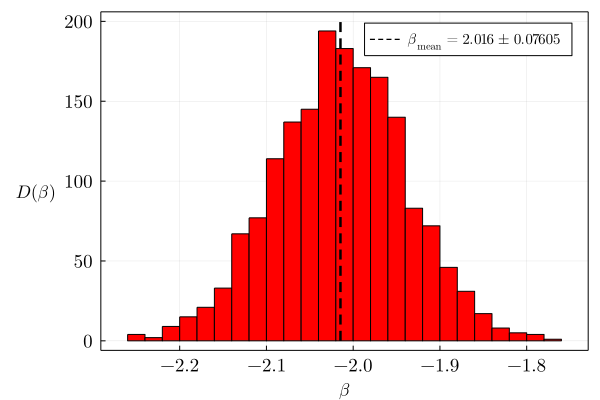

In [4]:
mVectorSize = 180
MaxRand = 10
maximumPrimeBlockSize =  6
types = ["Random", "Prime"]
power_law = []

for i in 1:length(types)
        tipo = types[i]
        for j in 2:maximumPrimeBlockSize
            primeBlockSize = j
            for k in 1:factorial(primeBlockSize)
                fit = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/POWER_SPECTRA_STATIONARY_FIT/fit_powerspectra_n_0_$(k)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(primeBlockSize).csv")
                power_law = vcat(power_law,fit[2])
            end
        end
end
average = mean(power_law)
stdDeviation = std(power_law)
histogram(power_law, 
    c=:red, fontfamily = "Computer Modern", xlabel = L"\beta", ylabel = L"D(\beta)", yguidefontrotation = -90,
    legendfontsize = 10, yguidefontsize = 12, xguidefontsize = 12, tickfontsizes = 12,
    left_margin = 10mm, framestyle = :box,
    label = :false)
plot!([mean(power_law);mean(power_law)],[0;200], ls = :dash, lw = 2.5, lc = :black, label = label = L"\beta_{\mathrm{mean}} =  %$(-Float16(average)) \pm %$(Float16(stdDeviation[1]))")